In [37]:
from h5py.h5i import DATASET
from openpyxl.styles.builtins import output
from pkg_resources import non_empty_lines
from sympy.physics.secondquant import InnerProduct
from tensorflow.compiler.tf2xla.python.xla import reduce
from tensorflow.python.keras.legacy_tf_layers.core import dense
from torch.multiprocessing.reductions import reduce_typed_storage
from twisted.conch.ssh.connection import messages
%load_ext autoreload
%autoreload 2


import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import keras
import numpy as np
from graph import *
from encoder import create_encoder
import pandas as pd

from data_processing import processer
from semantic_clustering import *
import tensorflow_gnn as tfgnn
from tensorflow_gnn.keras.layers import GraphUpdate, SimpleConv

from RepresentationLearner import RepresentationLearner
from compute import *
from GNN import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:

num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [3]:
x_data = np.concatenate([x_train, x_test])
y_data = np.concatenate([y_train, y_test])

classes = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
]

In [4]:
x_data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
target_size = 32
representation_dims = 512
projection_units = 128
num_clusters = 28
kn = 5
tune_encoder_during_clustering = False

In [6]:
x_data = x_data.astype('float32')
processer.layers[-1].adapt(x_data)
x_data

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [7]:
encoder = create_encoder(
    representation_dims
)

In [16]:

lr_scheduler = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.001,
    decay_steps=500,
    alpha=0.1
)
optimizer = keras.optimizers.AdamW(learning_rate=lr_scheduler, weight_decay=0.0001)

representation_learner.compile(
    optimizer=optimizer,
    jit_compile=False,
)

history = representation_learner.fit(
    x=x_data,
    batch_size=512,
    epochs=50
)



Epoch 1/50


I0000 00:00:1747825978.910896   35487 cuda_dnn.cc:529] Loaded cuDNN version 90501


118/118 ━━━━━━━━━━━━━━━━━━━━ 66s 321ms/step - loss: 7.4376
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 299ms/step - loss: 4.4147
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 34s 290ms/step - loss: 3.6570
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 34s 288ms/step - loss: 3.3550
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 294ms/step - loss: 3.2244
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 297ms/step - loss: 3.1556
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 36s 302ms/step - loss: 3.0994
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 34s 292ms/step - loss: 3.0526
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 299ms/step - loss: 3.0012
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 294ms/step - loss: 2.9547
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 34s 291ms/step - loss: 2.9066
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - loss: 2.8558
Epoch 13/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 36s 304ms/step - loss: 2.8178
Epoch 14/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 36s 303ms/step - loss: 2.7811
Epoch 15/50
118/118 ━━━━━━

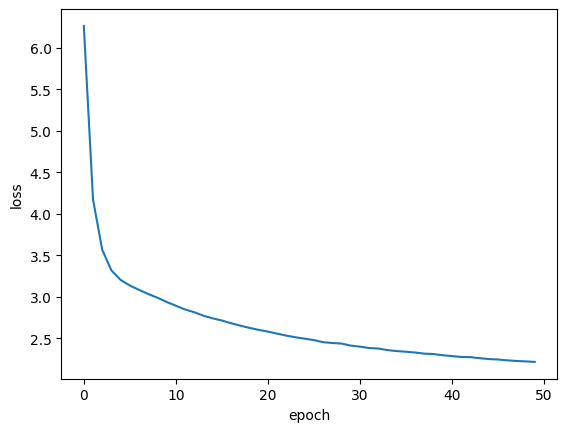

In [18]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [19]:
batch_size = 500
feature_vectors = encoder.predict(x_data, batch_size=batch_size, verbose=1)
feature_vectors = keras.utils.normalize(feature_vectors)


I0000 00:00:1747828254.559616   35466 service.cc:152] XLA service 0x7f274c02edc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747828254.559801   35466 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-05-21 12:50:54.689763: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-21 12:50:56.026896: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1483', 4 bytes spill stores, 4 bytes spill loads

2025-05-21 12:50:56.055360: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1483_0', 108 bytes spill stores, 108 bytes spill loads

2025-05-21 12:50:56.136808: I ext

 11/120 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

I0000 00:00:1747828259.964188   35466 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step


In [20]:
knns = compute_knn(feature_vectors, batch_size=batch_size, kn=kn)


100%|██████████| 120/120 [00:04<00:00, 25.73it/s]


In [26]:
for layer in encoder.layers:
    layer.trainable = tune_encoder_during_clustering

clustering_model = create_clustering_model(encoder, num_clusters, input_shape, name='clustering')
clustering_learner = create_clustering_learner(clustering_model, input_shape)

losses = [ClustersEntropyLoss(), ClustersEntropyLoss(entropy_loss_weight=5)]

inputs = {"anchor": x_data, 'neighbours': tf.gather(x_data, knns)}
labels = [np.ones(shape=(x_data.shape[0], kn)), np.ones(shape=(x_data.shape[0], kn))]

clustering_learner.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=0.0005, weight_decay=0.0001),
    loss=losses,
    jit_compile=False,
)

clustering_learner.fit(
    x=inputs,
    y=labels,
    batch_size=512,
    epochs=50
)



Epoch 1/50


2025-05-21 12:53:31.221180: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.80GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-21 12:53:31.537253: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.64GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-21 12:53:31.617778: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.63GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - clustering_loss: 0.0491 - loss: 0.3631 - simlarity_loss: 0.3139
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - clustering_loss: 0.0266 - loss: -0.1694 - simlarity_loss: -0.1960
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 142ms/step - clustering_loss: 0.0200 - loss: -0.1981 - simlarity_loss: -0.2182
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - clustering_loss: 0.0179 - loss: -0.2060 - simlarity_loss: -0.2238
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - clustering_loss: 0.0180 - loss: -0.2075 - simlarity_loss: -0.2255
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 142ms/step - clustering_loss: 0.0192 - loss: -0.2064 - simlarity_loss: -0.2257
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 141ms/step - clustering_loss: 0.0176 - loss: -0.2082 - simlarity_loss: -0.2258
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - clustering_loss: 0.0184 - loss: -0.2084 - simlarity_loss: -0.2268
Epoch 9/50
118/118 ━━━━━━━━━━

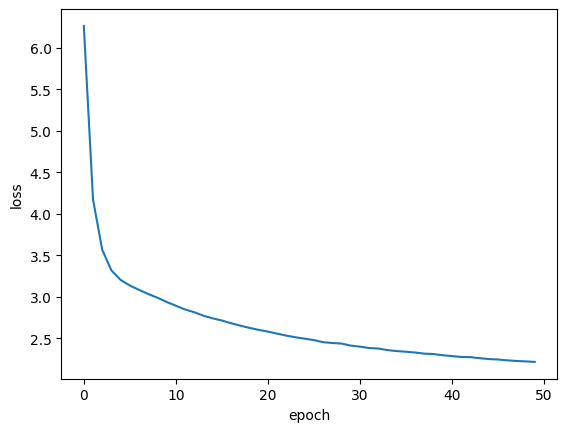

In [27]:
plt.plot(history.history["loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()


In [32]:
clustering_probabilitiys = clustering_model.predict(x_data, batch_size=batch_size)
cluster_assigment = keras.ops.argmax(clustering_probabilitiys, axis=-1).numpy()

cluster_confidence = keras.ops.max(clustering_probabilitiys, axis=-1).numpy()

120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


In [33]:
from collections import defaultdict

clusters = defaultdict(list)

for idx, c in enumerate(cluster_assigment):
    clusters[c].append((idx, cluster_confidence[idx]))

non_empty_clusters = defaultdict(list)

for c in clusters.keys():
    if clusters[c]:
        non_empty_clusters[c] = clusters[c]

for c in range(num_clusters):
    print(f"Cluster {c}:  {len(clusters[c])}")

Cluster 0:  2029
Cluster 1:  1465
Cluster 2:  2180
Cluster 3:  2458
Cluster 4:  1863
Cluster 5:  1951
Cluster 6:  2837
Cluster 7:  1804
Cluster 8:  2289
Cluster 9:  2090
Cluster 10:  1849
Cluster 11:  2386
Cluster 12:  2472
Cluster 13:  1587
Cluster 14:  1897
Cluster 15:  2129
Cluster 16:  2313
Cluster 17:  2045
Cluster 18:  2474
Cluster 19:  2419
Cluster 20:  2267
Cluster 21:  2290
Cluster 22:  2053
Cluster 23:  1782
Cluster 24:  1687
Cluster 25:  2791
Cluster 26:  2792
Cluster 27:  1801


In [47]:
from sklearn.neighbors import NearestNeighbors

k = 5
cluster_knns = {}

for c, members in non_empty_clusters.items():
    indices = [idx for idx, _ in members]
    if len(indices) < k + 1:

        continue

    clutser_features = feature_vectors[indices]
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='auto').fit(clutser_features)

    distances, n_indices = nbrs.kneighbors(clutser_features)

    knns = [ [indices[n] for n in n[1:]] for n in n_indices]

    cluster_knns[c] = dict(zip(indices, knns))



In [114]:
import tensorflow_gnn as tfgnn

node_features = clutser_features

edge_sources = []
edge_targets = []

for cluster in cluster_knns.values():
    for node_idx, neighbors in cluster.items():
        for neighbor in neighbors:
            edge_sources.append(node_idx)
            edge_targets.append(neighbor)

edge_sources = tf.constant(edge_sources, dtype=tf.int32)
edge_targets = tf.constant(edge_targets, dtype=tf.int32)


In [119]:
edge_sources

<tf.Tensor: shape=(300000,), dtype=int32, numpy=array([    0,     0,     0, ..., 59960, 59960, 59960], dtype=int32)>

In [120]:
edge_targets

<tf.Tensor: shape=(300000,), dtype=int32, numpy=array([55438, 41916, 50980, ..., 52079, 36389,  9597], dtype=int32)>

In [156]:
graph = tfgnn.GraphTensor.from_pieces(
    node_sets={
        'nodes': tfgnn.NodeSet.from_fields(
            sizes=[node_features.shape[0]],
            features={'node_features': tf.constant(node_features)}

        )
    },
    edge_sets={
        'edges': tfgnn.EdgeSet.from_fields(
            sizes=[len(edge_sources)],
            adjacency=tfgnn.Adjacency.from_indices(
                source=('nodes', edge_sources),
                target=('nodes', edge_targets),
            )
        )
    }
)